## Tabla de contenido:
1. [Introducción](#1-bullet)
    1. [Que es la correlación de atributos](#1.1-bullet)
    2. [Covarianza](#1.2-bullet)
    3. [Tipos de correlación](#1.3-bullet)
        1. [Coeficiente de correlación de Pearson](#1.3.1-bullet)
        2. [Correlación de Spearman](#1.3.2-bullet)
        3. [Correlación de Kendall](#1.3.3-bullet)
2. [Desarrollo](#2-bullet)
    1. [Calculando la correlación en Pandas](#1.2-bullet)

## Introducción <a class="anchor" id="1-bullet"></a>

### Que es la correlación de atributos <a class="anchor" id="1.1-bullet"></a>

> En probabilidad y estadística, la correlación indica la fuerza y la dirección de una relación lineal y proporcionalidad entre dos variables estadísticas. Se considera que dos variables cuantitativas están correlacionadas cuando los valores de una de ellas varían sistemáticamente con respecto a los valores homónimos de la otra: si tenemos dos variables (A y B) existe correlación entre ellas si al disminuir los valores de A lo hacen también los de B y viceversa. La correlación entre dos variables no implica, por sí misma, ninguna relación de causalidad. (Wikipedia español)

La correlación es uno de los conceptos estadísticos más utilizados.

El término *correlación*, refiere a la relación que existen entre cantidades. Más específicamente refiere a la distribución de dichas cantidades. Por ejemplo, en el ejemplo del Titanic ({filename}/posts/ipython/Titanic_dataset_analisis), el atributo "Life Boat" está correlacionado con la variable de salida, por el motivo de que si algún pasajero tiene el atributo "Life Boat" no vacío, es muy posible que se haya salvado, lo que implica que el atributo "Survived" (variable dependiente) se encuentra en "Si". Ambos atributos siguen la misma distribución, y según los datos que tenemos del negocio, sabemos que están muy correlacionados.

¿Por qué la correlación es importante?
Por varios motivos:
* La correlación entre atributos permite predecir el valor de uno a partir del otro.
* La correlación puede (aunque usualmente no pasa) indicar la presencia de relaciones causales (como en el caso del Titanic).
* La correlación se utiliza como base para algunos modelos.

### Covarianza <a class="anchor" id="1.2-bullet"></a>

La covarianza es una medida estadística de asociación entre dos variables $X$ e $Y$. Se calcula como:

$$\sigma_{xy}=\dfrac{ \sum f_i (x_i - \bar x)(y_i - \bar y)}{N}$$

O, arreglando los factores:

$$\sigma_{xy}=\dfrac{ \sum f_i x_i y_i}{N} - \bar x \bar y$$

Donde la covarianza indica el sentido de la correlación entre las variables:
* Si $\sigma_{xy} > 0$ la correlación es directa.
* Si $\sigma_{xy} < 0$ la correlación es inversa.

La covarianza presenta como inconveniente el hecho de que su valor depende de la escala elegida. Por ejemplo, la $\sigma_{xy}=1.2$ y la $\sigma_{tz}=3.4$ nos dicen que los pares están positivamente asociados, pero no nos dice si la relación de $X$ con $Y$ es mayor a la de $T$ con $Z$.

Por este motivo la covarianza es útil cuando todos los atributos siguen en la misma escala, ya que en ese punto podemos comparar cual "covarianza" es más fuerte que otra.

### Tipos de correlación <a class="anchor" id="1.3-bullet"></a>

#### Coeficiente de correlación de Pearson <a class="anchor" id="1.3.1-bullet"></a>
<small>https://en.wikipedia.org/wiki/Pearson_correlation_coefficient</small>

El coeficiente de correlación de Pearson es el más utilizado. Esta correlación mide la asociación linear entre variables continuas. En otras palabras, este coeficiente cuantifica el grado en el cual una relación entre dos variables puede ser expresada como una línea.

El coeficiente de Pearson se refiere como $\rho$.

La fórmula original para la correlación utiliza los datos planos ("raw") y las medias de las dos variables, $X$ e $Y$:

$$\rho_{X,Y}=\dfrac{\sum (X_i - \bar X)(Y_i - \bar Y)}{\sqrt{\sum (X_i - \bar X)^2 \sum (Y_i - \bar Y)^2}}$$

En esta fórmula, las instancias son centradas restando la media y re-escaladas utilizando las desviaciones estándar. *Nota: Podemos ver que el término en el numerador es la covarianza*

También se expresa:

$$\rho_{X,Y}=\dfrac{cov(X,Y)}{\sigma_X \sigma_Y}$$

Al dividir la covarianza de dos variables entre el producto de sus derivaciones estándar, asegura que la correlación siempre esté en el intervalo $[-1, 1]$

Cuanto más cerca de 1 esté $\rho$, más relacionadas positivamente se encuentran las variables (cuanto más se incrementa una más se incrementa la otra). Por otro lado, cuanto más cerca de -1 esté, indica una relación inversamente proporcional (cuanto más se incremente una, más se decrementa la otra). Si $X$ e $Y$ son independientes, $\rho$ tiende a 0.

<div style="text-align:center"><img src="{filename}/posts/post-img/Correlacion_de_atributos_1.PNG" alt="drawing" width="40%" height="40%"/></div>

Podemos notar también que la tangente de la recta de regresión lineal tiene una relación con el coeficiente de Pearson, dicha relación sigue que:

$$\rho=m \dfrac{S_x}{S_y}$$

Donde $m$ es la tangente de la recta de regresión.

En otras palabras, la correlación refleja la asociación y la cantidad de variabilidad entre las dos variables.

Cabe destacar que la correlación no es igual a la tangente (es una medida estandarizada de la variabilidad de los datos). Por ejemplo, es posible tener un valor muy bajo para la tangente y sin embargo tener una correlación muy alta.

<div style="text-align:center"><img src="{filename}/posts/post-img/Correlacion_de_atributos_2.PNG" alt="drawing" width="40%" height="40%"/></div>

No hace falta agregar, que la correlación es altamente susceptiva a los valores anómalos.

Otra forma de interpretar la correlación de Pearson, es utilizar el coeficiente de determinación $R^2$. Mientras $\rho$ no tienen unidad, el cuadrado de $\rho$ es interpretado como la proporción que varía la variable $Y$ explicada por la $X$. Ej: 

$$\rho = -0.5 \rightarrow (-0.5)^2 * 100 = 42\%$$

O sea, 42% de variación de $Y$ puede ser explicada por $X$.

#### Correlación de Spearman <a class="anchor" id="1.3.2-bullet"></a>
<small>https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient</small>

La correlación de Spearman puede ser definido como un caso especial del coeficiente de correlación de Pearson ($\rho$) aplicado a variables que están ordenadas. A diferencia de Pearson, la correlación de Spearman no está restingida a relaciones lineales.

Mide si la asocicaicón entre las variables es creciente o decreciente. En vez de comparar la media y la varianza de las variables, lo que hace es mirar el orden relativo de los valores para cada variable. Esto lo hace adecuado para aplicarse tanto a variables discretas como variables continuas.

La fórmula es:

$$\rho_(rg_X, rg_y) = \frac{cov(rg_X, rg_Y)}{\sigma_(rg_X) \sigma_(rg_Y)}$$

Donde:
- $rg_X$ y $rg_Y$ $\rightarrow$ Indican los datos ordenados.

Si todos los rangos $n$ son *enteros distintos*, se puede reducir a:

$$r_s = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}$$

Donde:
- $d_i = rg(X_i) - rg(Y_i)$ $\rightarrow$ Es la diferencia entre los dos rangos de cada observación.
- $n$ $\rightarrow$ Es el número de obaservaciones.

Para muestras mayores de 20 observaciones, se puede utilizar la siguiente aproximación (distribución t-Student):

$$t = \frac{\rho}{\sqrt{\frac{(1 - \rho^2)}{(n - 2)}}}$$

En los siguientes ejemplos podemos ver como se comparan Spearman con Pearson:

<div style="text-align:center"><img src="{filename}/posts/post-img/Correlacion_de_atributos_3.PNG" alt="drawing" width="40%" height="40%"/></div>

El hecho de que estos métodos no den que los datos estén relacionados, no significa que no lo estén. El primero (Pearson) solamente indica una relación lineal, mientras el segundo indica si hay una relación creciente o decreciente (no necesariamente lineal).

#### Correlación de Kendall <a class="anchor" id="1.3.3-bullet"></a>
<small>https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient</small>

El coeficiente de correlación de Kendall también se basa en el ordenamiento de los datos, sin embargo, a diferencia de Spearman, no tiene en cuenta la diferencia entre los rangos, sino únicamente la relacción direccional. Por lo tanto, este coeficiente es más apropiado para datos discretos.

El coeficiente se define como:

$$\tau = \frac{(numeros de pares concordantes) - (numeros de pares discordantes)}{N(n - 1)/2}$$

El denominador es solamente para normalizar los valores entre 1 y -1.

Ejemplo:
```python
# Utilizamos la estructura de datos "DataFrame" de la librería "Pandas".
k = pd.DataFrame()
# Creamos un arreglo con 5 elementos utilizando la librería "Numpy": [1, 2, 3, 4, 5]
k['X'] = np.arange(5) + 1
k['Y'] = [7, 5, 1, 6, 9]
# Imprimimos la correlación.
print (k.corr(method = 'kendall'))
```

```
    X    Y
X  1.0  0.2
Y  0.2  1.0
```

### Calculando la correlación en Pandas <a class="anchor" id="2.1-bullet"></a>

Usaremos el dataset [Auto MPG Data Set](https://archive.ics.uci.edu/ml/datasets/Auto+MPG). El objetivo es explicar el consumo de combustible (mpg) según las características del vehículo.

In [49]:
# Importamos la librería.
import pandas as pd
# Cargamos el dataset.
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
# Lo importamos y le nombramos las columnas.
data = pd.read_csv(path, delim_whitespace=True, header=None,
            names = ['mpg', 'cylinders', 'displacement','horsepower',
            'weight', 'acceleration', 'model_year', 'origin', 'name'],
            na_values='?')
# Mostramos algunos ejemplos de instancias del conjunto.
data.sample(5)

mpg  cylinders  displacement  horsepower  weight  acceleration  \
226  20.5          6         231.0       105.0  3425.0          16.9   
145  32.0          4          83.0        61.0  2003.0          19.0   
290  15.5          8         351.0       142.0  4054.0          14.3   
213  13.0          8         350.0       145.0  4055.0          12.0   
269  30.9          4         105.0        75.0  2230.0          14.5   

     model_year  origin                      name  
226          77       1             buick skylark  
145          74       3                datsun 710  
290          79       1  ford country squire (sw)  
213          76       1                 chevy c10  
269          78       1                dodge omni

In [50]:
# Obtenemos la información del conjunto.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [51]:
# Obtenemos datos faltantes.
pd.isnull(data).sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [52]:
# Eliminamos faltantes, ya que son pocos.
data.dropna(inplace = True)
# Chequeamos nuevamente.
pd.isnull(data).sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

Pandas nos brinda el método ```corr()``` para calcular la correlación entre las columnas. En nuestro ejemplo, podemos probar si vehículos más pesados tienen menos consumo de combustible.

In [53]:
data['mpg'].corr(data['weight'])

-0.8322442148315754

El ejemplo anterior podemos ver que efectivamente están correlacionados. Si no se especifica ningun método, Pandas utiliza Pearson por defecto. Podemos especifiar los tres métodos vistos anteriormente: Kendall, Spearman o Pearson.

In [54]:
# Correlación pearson.
data.corr(method='pearson')

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model_year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration  model_year    origin  
mpg               0.423329    0.580541  0.565209  
cylinders        -0.504683   -0.345647 -0.568932  
displacement     -0.543800   -0.369855 -0.614535  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.416839   -0.309120 -0.585005  
acceleration      1.000000    0.290316  0.212746  
model_year        0.290316    1.000000  0.181528  
origin            0.212746    0.181528  1.000000

In [55]:
# Correlación entre pares.
data.corr(method='kendall')

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.687444     -0.678586   -0.679166 -0.694243   
cylinders    -0.687444   1.000000      0.796611    0.686146  0.738015   
displacement -0.678586   0.796611      1.000000    0.718471  0.799706   
horsepower   -0.679166   0.686146      0.718471    1.000000  0.703730   
weight       -0.694243   0.738015      0.799706    0.703730  1.000000   
acceleration  0.303146  -0.368486     -0.353873   -0.488239 -0.268563   
model_year    0.415247  -0.270179     -0.219933   -0.277831 -0.199813   
origin        0.468383  -0.556915     -0.572568   -0.406024 -0.499051   

              acceleration  model_year    origin  
mpg               0.303146    0.415247  0.468383  
cylinders        -0.368486   -0.270179 -0.556915  
displacement     -0.353873   -0.219933 -0.572568  
horsepower       -0.488239   -0.277831 -0.406024  
weight           -0.268563   -0.199813 -0.499051  
acceleration      1.000000    0.198396  0.178324  
model_year        0.198396    1.000000  0.136037  
origin            0.178324    0.136037  1.000000

In [56]:
# Correlación spearman.
data.corr(method='spearman')

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.823175     -0.855234   -0.853616 -0.875585   
cylinders    -0.823175   1.000000      0.913566    0.816188  0.875972   
displacement -0.855234   0.913566      1.000000    0.876171  0.945630   
horsepower   -0.853616   0.816188      0.876171    1.000000  0.878819   
weight       -0.875585   0.875972      0.945630    0.878819  1.000000   
acceleration  0.441539  -0.476266     -0.499403   -0.658142 -0.405109   
model_year    0.574841  -0.331087     -0.306582   -0.389498 -0.280981   
origin        0.580482  -0.610468     -0.709573   -0.508989 -0.631371   

              acceleration  model_year    origin  
mpg               0.441539    0.574841  0.580482  
cylinders        -0.476266   -0.331087 -0.610468  
displacement     -0.499403   -0.306582 -0.709573  
horsepower       -0.658142   -0.389498 -0.508989  
weight           -0.405109   -0.280981 -0.631371  
acceleration      1.000000    0.278306  0.227406  
model_year        0.278306    1.000000  0.165399  
origin            0.227406    0.165399  1.000000

La correlación es muy importante, especialmente para los modelos de regresión. Variables independientes altamente correlacionadas impactan negativamente en los coeficientes.

In [57]:
# Librería utilizada para imprimir los gráficos.
from matplotlib import pyplot as plt
# Se imprime el gráfico con valores redondeados a 2 dígitos.
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

Finalmente, podemos ver gráficamente las relaciones mediante gráficas de puntos y calcular los coeficientes de Spearman y Pearson.

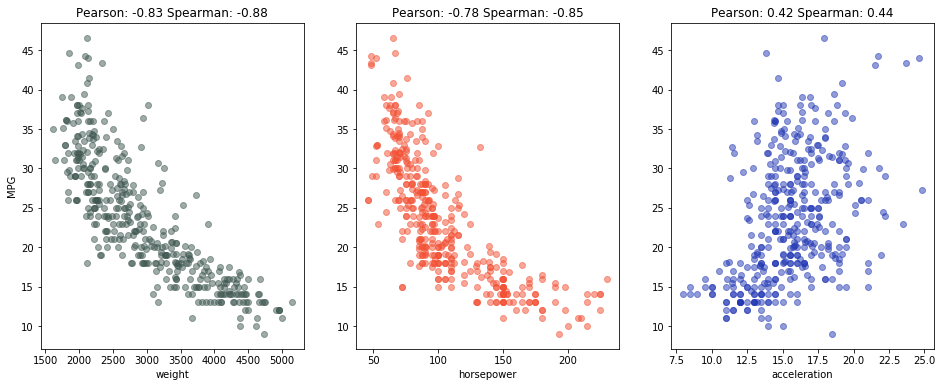

In [58]:
# Seteo el tamaño de los gráficos.
plt.rcParams['figure.figsize'] = [16, 6]
# Creo una figura y un conjunto de subtramas, donde va a haber tres gráficos (ncol=3) con el eje Y compartido (nrows=1).
fig, ax = plt.subplots(nrows=1, ncols=3)
# Pongo todas las columnas en una misma fila.
ax = ax.flatten()
# Seteo las columnas.
cols = ['weight', 'horsepower', 'acceleration']
# Seteo los colores.
colors=['#415952', '#f35134', '#243AB5']

# Para cada subgráfico i en ax (tiene todos los gráficos), imprimo la correlación deseada.
j = 0
for i in ax:
    if j == 0:
        # Seteo el nombre del eje Y.
        i.set_ylabel('MPG')
    # Grafico (es un subgráfico).
    i.scatter(data[cols[j]], data['mpg'],  alpha=0.5, color=colors[j])
    # Seteo el nombre del eje X.
    i.set_xlabel(cols[j])
    # Seteo los datos de la correlación.
    i.set_title('Pearson: %s'%data.corr().loc[cols[j]]['mpg'].round(2)+' Spearman: %s'%data.corr(method='spearman').loc[cols[j]]['mpg'].round(2))
    # Paso al siguiente subgráfico.
    j += 1

# Muestro el gráfico.
plt.show()